In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

C:\Users\HP\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [3]:
df = pd.read_csv('spam.csv',encoding='latin1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# Most of the cols in ['Unnamed: 2','Unnamed: 3','Unnamed: 4'] are null

df.drop(columns= ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True )

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# Checking duplicates
df.duplicated().sum()

403

In [9]:
df = df.drop_duplicates(keep = 'first')

In [10]:
df.shape

(5169, 2)

In [11]:
df.duplicated().sum()

0

In [12]:
# Changing Column names

df1 = df.rename(columns = {'v1':'Target','v2':'Message'})

In [13]:
df1.head()

,Target,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# Assignng Ham as 0 else 1 can be done using Label endoder but Iam doing with lambda funcrion

df1['Target'] = df1['Target'].apply(lambda x: 0 if x == 'ham' else 1)



In [15]:
df1.head()

,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# Missing vals

df1.isnull().sum()

Target     0
Message    0
dtype: int64

In [17]:
df1['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

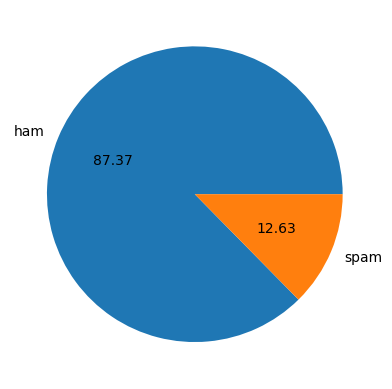

In [19]:
plt.pie(df1['Target'].value_counts(),labels= ['ham','spam'], autopct = '%0.2f')
plt.show()

* 87% of Data is ham and 12 to 13% of data available is SPAM
* Data is imbalanced

### Data Preprocessing


In [20]:
# let us create a function for dat Preprocessing

def text_preprocessor(text):
    # Convert to lower case
    text = text.lower()
    
    #Removing special characters
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern, '', text)
    
    #Tokenization
    text = nltk.word_tokenize(text)
    
    #Removing stopwords and punctualtion
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word.lower() not in stop_words]
    #Stemming
    text= [ps.stem(word) for word in text]
    
    
    return " ".join(text)

In [21]:
ps = PorterStemmer()

In [22]:
text_preprocessor('this is my presentation in ML')

'present ml'

In [23]:
df1['transformed_text']=df1['Message'].apply(text_preprocessor)

In [24]:
df1.head()

,Target,Message,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though


In [25]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size  = 10, background_color = 'white')

In [26]:
# pip install wordcloud

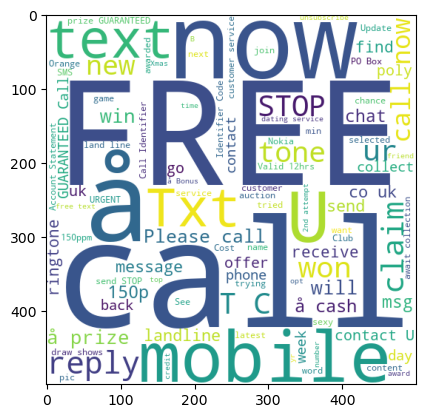

In [27]:
plt.imshow(wc.generate(df1[df1['Target']==1]['Message'].str.cat(sep= "")))

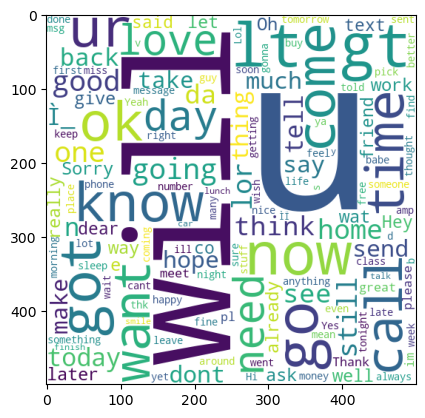

In [28]:
plt.imshow(wc.generate(df1[df1['Target']==0]['Message'].str.cat(sep= "")))

### Modelling

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features = 3000)

In [30]:
X  = tfidf.fit_transform(df1['transformed_text']).toarray()

In [31]:
X.shape

(5169, 3000)

In [32]:
y = df1.Target.values

In [33]:
y.shape

(5169,)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score 

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 2)

In [36]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [37]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [38]:
def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted)
    
    return accuracy,precision

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [40]:
models = {
    "gnb": GaussianNB(),
    "mnb": MultinomialNB(),
    "bnb": BernoulliNB(),
    "Logistic":LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(max_depth = 5),
    "SVC":SVC(kernel = 'sigmoid', gamma = 1.0),
    #"KNC":KNeighborsClassifier(),
    "RF":RandomForestClassifier(n_estimators =50, random_state = 2),
    "XGB":XGBClassifier(n_estimators =50, random_state = 2),
    
}

model_list = []
accuracy_list =[]
precision_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_accuracy_score,train_precision = evaluate_model(y_train, y_train_pred)
    test_accuracy_score, test_precision = evaluate_model(y_test, y_test_pred)
    
    model_list.append(list(models.keys())[i])
    accuracy_list.append(test_accuracy_score)
    precision_list.append(test_precision)
    
    


[15:45:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [41]:
performance_df= pd.DataFrame(list(zip(model_list, accuracy_list,precision_list)), columns=['Model Name', 'Accuracy','Precision']).sort_values(by=["Precision"],ascending=False)
performance_df

,Model Name,Accuracy,Precision
1,mnb,0.975500,1.000000
2,bnb,0.982592,0.993976
6,RF,0.974210,0.987097
5,SVC,0.976789,0.975460
3,Logistic,0.950999,0.967480
7,XGB,0.967763,0.937888
4,DecisionTreeClassifier,0.935525,0.797386
0,gnb,0.874919,0.495385


In [42]:
performance_df1 = pd.melt(performance_df, id_vars = "Model Name")


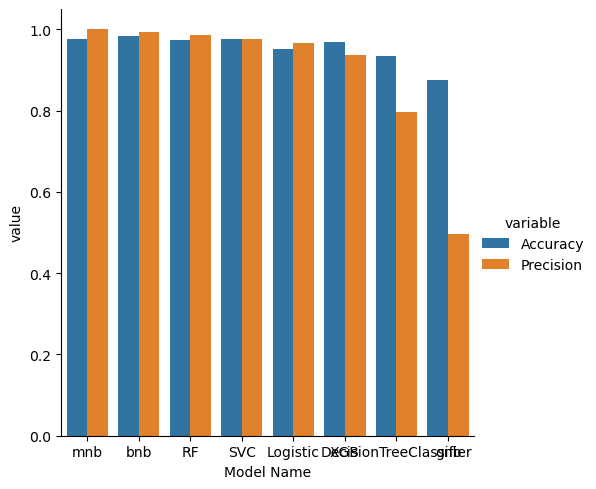

In [43]:
sns.catplot(x = 'Model Name', y ='value', hue = 'variable',
             data =performance_df1, kind  = 'bar' )

* MultinomialNB, BernoulliNB and Random forest are the best models
* Though BernoulliNB has highest Accuracy ,MultinomialNB has high precision and Accuracy

In [44]:
#Lets run MNB

mnb= MultinomialNB()

mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9754996776273372
[[1360    0]
 [  38  153]]
1.0


In [45]:
import pickle

pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('spam_model.pkl','wb'))
